### 순차 데이터
- 텍스트 데이터(ex: I am a boy) : 순서가 의미가 있다. 
- 시계열 데이티(ex: 1일 10도, 2일 8도) 

---
### 순환신경망(RNN : Recurrent Neural Network

- IMDB (Internet Movie Data Base)
- IMDB 구성 : Train Data(25000개 중 긍정 12500개 부정 12500개, Test Data(25000개 중 긍정 12500, 부정 12500))
- NLP : Natural Language Processing(자연어 처리)
- 말뭉치 : 하나의 데이터셋을 말뭉치라고 표현
- 토큰 : 하나의 단어를 토큰이라고 표현
- 어휘사전 : 번호로 구분된 유일한 단어들의 집단.
- 머신러닝이나 딥러닝에서는 데이터가 숫자로 구성되어 있어야 함으로 이런 단어들을 고유한 번호로 할당하여 사용


In [3]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500) # 500개 단어


NameError: name 'tensorflow' is not defined

In [4]:
import tensorflow
tensorflow.config.list_physical_devices('GPU')

[]

In [5]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [6]:
# train의 첫번째 문장의 Token 갯수
len(train_input[0])

218

In [7]:
len(train_input[1])

189

In [8]:
# 첫번째 댓글 출력
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


- 샘플의 시작부분 토큰은 1을 사용한다.
- 2는 선정한 단어갯수에 포함되지 않는 단어를 표현한다.
- train_input 자체는 numpy 배열이나 댓글에 사용된 토큰 수가 다르기 때문에 numpy 배열을 사용못하고 python list를 사용한다.

In [9]:
# train의 target 출력
print(train_target[:10]) # 1은 좋아요 0은 나빠요

[1 0 0 1 0 0 1 0 1 0]


In [10]:
# 훈련세트 준비
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [11]:
# 깍 리뷰마다 문장 길이를 시각화

import numpy as np
lengths = np.array([len(x) for x in train_input])
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


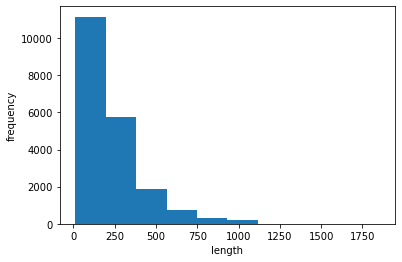

In [12]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

---
### Sequence Padding
- 전체 자릿수를 100으로 가정했을 경우 한문장에 3개 토큰만 있을 경우 나머지 97개는 비워지고 이를 0으로 채우는 과정

In [13]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100) # 위의 차트에서 100개 부분이 제일 많은 것 같아 100개의 토큰만 사용
val_seq = pad_sequences(val_input, maxlen= 100)

In [14]:
# 크기 확인
print(train_seq.shape)

(20000, 100)


> 25000개의 훈련세트 중 500개는 검증세트로 빠짐

In [15]:
# 첫번째 댓글 확인
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [16]:
# 원본의 첫번째 댓글의 마지막 10개만 출력
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [17]:
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


---
# 순환 신경망 모델 만들기

In [18]:
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8,input_shape=(100, 500))) # 500 : One Hot Encoding  숫자가 의미가 없으면 무적권
model.add(keras.layers.Dense(1,activation = 'sigmoid'))


In [19]:
# One hot encoding
train_oh = keras.utils.to_categorical(train_seq)
print(train_oh.shape)

(20000, 100, 500)


In [20]:
# one hot encoding 확인하기
print(np.sum(train_oh[0][0]))

1.0


In [21]:
val_oh = keras.utils.to_categorical(val_seq)

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


500 * 8 + (8 * 8)[8개의 뉴런이 8번 반복] + 8[절편]

In [23]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)

model.compile(optimizer= rmsprop, 
              loss = 'binary_crossentropy',
              metrics = 'accuracy'
              )

early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True )
checkpoint_cb = keras.callbacks.ModelCheckpoint('../Data/best-simplernn-model.h5')

history = model.fit(
    train_oh,
    train_target, 
    epochs =100, # RNN에서 가장 낮은 에포크가 100
    batch_size = 64, # 미니배치 경사 하강법|
    validation_data = (val_oh,val_target),
    callbacks = [checkpoint_cb,early_stopping_cb]
)

Epoch 1/100


2022-07-22 12:07:30.060996: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


313/313 [==============================] - 7s 19ms/step - loss: 0.6976 - accuracy: 0.4992 - val_loss: 0.6952 - val_accuracy: 0.5112
Epoch 2/100
313/313 [==============================] - 6s 18ms/step - loss: 0.6946 - accuracy: 0.5104 - val_loss: 0.6938 - val_accuracy: 0.5094
Epoch 3/100
313/313 [==============================] - 6s 18ms/step - loss: 0.6921 - accuracy: 0.5191 - val_loss: 0.6924 - val_accuracy: 0.5146
Epoch 4/100
313/313 [==============================] - 6s 18ms/step - loss: 0.6899 - accuracy: 0.5296 - val_loss: 0.6908 - val_accuracy: 0.5224
Epoch 5/100
313/313 [==============================] - 6s 18ms/step - loss: 0.6874 - accuracy: 0.5433 - val_loss: 0.6889 - val_accuracy: 0.5324
Epoch 6/100
313/313 [==============================] - 6s 18ms/step - loss: 0.6842 - accuracy: 0.5566 - val_loss: 0.6857 - val_accuracy: 0.5462
Epoch 7/100
313/313 [==============================] - 6s 18ms/step - loss: 0.6782 - accuracy: 0.5832 - val_loss: 0.6750 - val_accuracy: 0.5888
Epoc

In [27]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

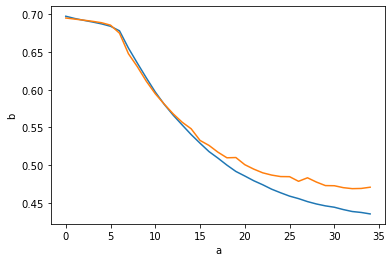

In [29]:
# 시각화 해보기
import matplotlib.pyplot as plt


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('a')
plt.ylabel('b')
plt.show()

---
### LSTM(Long Short Term Memory) 신경망 모델 구성하기
- 순환신경망의 셀로 이전 타입스텝의 샘플을 기억하고 있음

In [24]:
model = keras.Sequential()

model.add(keras.layers.Embedding(500,16,input_length = 100)) # one hot encoding, 16은 그냥 정하는 거? 8개 2개 세트로 묶어서 쓴다고 ? 함
model.add(keras.layers.LSTM(8)) # 8개의 Cell을 사용한다.
model.add(keras.layers.Dense(1,activation = 'sigmoid'))

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [25]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)

model.compile(optimizer= rmsprop, 
              loss = 'binary_crossentropy',
              metrics = 'accuracy'
              )

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True )
checkpoint_cb = keras.callbacks.ModelCheckpoint('../Data/best-lstm-model.h5')

history = model.fit(
    train_seq, 
    train_target, 
    epochs =100, # RNN에서 가장 낮은 에포크가 100
    batch_size = 64, # 미니배치 경사 하강법|
    validation_data = (val_seq,val_target),
    callbacks = [checkpoint_cb,early_stopping_cb]
)

Epoch 1/100


2022-07-22 11:46:45.289095: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-22 11:46:45.631138: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-22 11:46:46.716345: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - ETA: 0s - loss: 0.6921 - accuracy: 0.5533

2022-07-22 11:46:59.687772: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-22 11:46:59.759450: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 17s 44ms/step - loss: 0.6921 - accuracy: 0.5533 - val_loss: 0.6910 - val_accuracy: 0.5830
Epoch 2/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6877 - accuracy: 0.6314 - val_loss: 0.6830 - val_accuracy: 0.6588
Epoch 3/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6565 - accuracy: 0.6900 - val_loss: 0.6150 - val_accuracy: 0.7042
Epoch 4/100
313/313 [==============================] - 12s 39ms/step - loss: 0.5955 - accuracy: 0.7078 - val_loss: 0.5866 - val_accuracy: 0.7218
Epoch 5/100
313/313 [==============================] - 12s 39ms/step - loss: 0.5702 - accuracy: 0.7323 - val_loss: 0.5654 - val_accuracy: 0.7352
Epoch 6/100
313/313 [==============================] - 12s 40ms/step - loss: 0.5498 - accuracy: 0.7474 - val_loss: 0.5488 - val_accuracy: 0.7380
Epoch 7/100
313/313 [==============================] - 12s 39ms/step - loss: 0.5328 - accuracy: 0.7594 - val_loss: 0.5342 - val_accuracy: 0.75

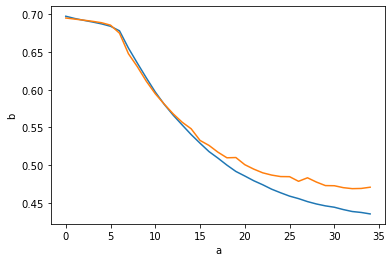

In [ ]:
# 시각화 해보기
import matplotlib.pyplot as plt


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('a')
plt.ylabel('b')
plt.show()

---
### 순환층에 Dropout 하기

In [39]:
model = keras.Sequential()

model.add(keras.layers.Embedding(500,16,input_length = 100))
model.add(keras.layers.LSTM(8,dropout=0.3)) # 8개의 Cell을 사용한다.

model.add(keras.layers.Dense(1,activation = 'sigmoid'))

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_1 (LSTM)               (None, 8)                 800       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [40]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)

model.compile(optimizer= rmsprop, 
              loss = 'binary_crossentropy',
              metrics = 'accuracy'
              )

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True )
checkpoint_cb = keras.callbacks.ModelCheckpoint('../Data/best-lstm-dropout-model.h5')

history = model.fit(
    train_seq, 
    train_target, 
    epochs =100, # RNN에서 가장 낮은 에포크가 100
    batch_size = 64, # 미니배치 경사 하강법|
    validation_data = (val_seq,val_target),
    callbacks = [checkpoint_cb,early_stopping_cb]
)

Epoch 1/100
313/313 [==============================] - 6s 14ms/step - loss: 0.6920 - accuracy: 0.5619 - val_loss: 0.6906 - val_accuracy: 0.6198
Epoch 2/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6878 - accuracy: 0.6245 - val_loss: 0.6832 - val_accuracy: 0.6708
Epoch 3/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6659 - accuracy: 0.6696 - val_loss: 0.6361 - val_accuracy: 0.7172
Epoch 4/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6133 - accuracy: 0.7172 - val_loss: 0.5939 - val_accuracy: 0.7286
Epoch 5/100
313/313 [==============================] - 4s 14ms/step - loss: 0.5865 - accuracy: 0.7301 - val_loss: 0.5722 - val_accuracy: 0.7416
Epoch 6/100
313/313 [==============================] - 4s 13ms/step - loss: 0.5649 - accuracy: 0.7418 - val_loss: 0.5527 - val_accuracy: 0.7534
Epoch 7/100
313/313 [==============================] - 4s 14ms/step - loss: 0.5455 - accuracy: 0.7527 - val_loss: 0.5344 - val_accuracy:

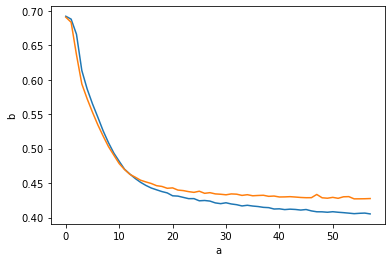

In [41]:
# 시각화 해보기
import matplotlib.pyplot as plt


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('a')
plt.ylabel('b')
plt.show()

---
## 2개층을 연결하기

In [42]:
model = keras.Sequential()

model.add(keras.layers.Embedding(500,16,input_length = 100))
model.add(keras.layers.LSTM(8,dropout=0.3, return_sequences=True)) # 2개층 이상을 쓸 때에는 return_sequences = True 라고 적어야 새로 만든 문장을 다시 입력해줌

model.add(keras.layers.LSTM(8,dropout=0.3)) # 모든 타임스텝의 은닉상태를 출력하려면 return_sequence = True하여야 한다.

model.add(keras.layers.Dense(1,activation = 'sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [43]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)

model.compile(optimizer= rmsprop, 
              loss = 'binary_crossentropy',
              metrics = 'accuracy'
              )

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True )
checkpoint_cb = keras.callbacks.ModelCheckpoint('../Data/best-lstm-2rnn-model.h5')

history = model.fit(
    train_seq, 
    train_target, 
    epochs =100, # RNN에서 가장 낮은 에포크가 100
    batch_size = 64, # 미니배치 경사 하강법|
    validation_data = (val_seq,val_target),
    callbacks = [checkpoint_cb,early_stopping_cb]
)

Epoch 1/100
313/313 [==============================] - 10s 26ms/step - loss: 0.6924 - accuracy: 0.5502 - val_loss: 0.6918 - val_accuracy: 0.5962
Epoch 2/100
313/313 [==============================] - 8s 25ms/step - loss: 0.6894 - accuracy: 0.6211 - val_loss: 0.6859 - val_accuracy: 0.6562
Epoch 3/100
313/313 [==============================] - 8s 25ms/step - loss: 0.6720 - accuracy: 0.6643 - val_loss: 0.6437 - val_accuracy: 0.6996
Epoch 4/100
313/313 [==============================] - 8s 25ms/step - loss: 0.6054 - accuracy: 0.7092 - val_loss: 0.5782 - val_accuracy: 0.7218
Epoch 5/100
313/313 [==============================] - 8s 26ms/step - loss: 0.5663 - accuracy: 0.7248 - val_loss: 0.5489 - val_accuracy: 0.7450
Epoch 6/100
313/313 [==============================] - 8s 25ms/step - loss: 0.5379 - accuracy: 0.7466 - val_loss: 0.5242 - val_accuracy: 0.7558
Epoch 7/100
313/313 [==============================] - 8s 26ms/step - loss: 0.5177 - accuracy: 0.7587 - val_loss: 0.5097 - val_accuracy

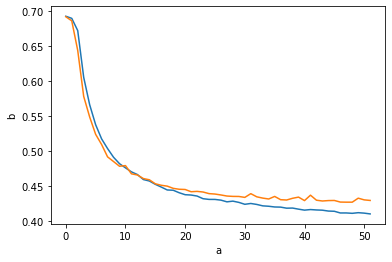

In [44]:
# 시각화 해보기
import matplotlib.pyplot as plt


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('a')
plt.ylabel('b')
plt.show()

-----
### GRU(Gated Recurrent Unit) 신경망
- LSTM의 간소화 버전
- LSTM은 다 좋은데 문장이 길어지면 셀이 기억하고 있던 것들이 너무 많다는 단점이 있음.
- GRU 는 셀의 기억 한도를 정해서 나머지에게 나머지 기억을 시킴₩

In [45]:
model = keras.Sequential()

model.add(keras.layers.Embedding(500,16,input_length = 100))
model.add(keras.layers.GRU(8)) # Dropout 자동으로 되는 것이 GRU의 특징이기에 적을 필요가없다.

model.add(keras.layers.Dense(1,activation = 'sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [46]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)

model.compile(optimizer= rmsprop, 
              loss = 'binary_crossentropy',
              metrics = 'accuracy'
              )

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True )
checkpoint_cb = keras.callbacks.ModelCheckpoint('../Data/best-gru-model.h5')

history = model.fit(
    train_seq, 
    train_target, 
    epochs =100, # RNN에서 가장 낮은 에포크가 100
    batch_size = 64, # 미니배치 경사 하강법|
    validation_data = (val_seq,val_target),
    callbacks = [checkpoint_cb,early_stopping_cb]
)

Epoch 1/100
313/313 [==============================] - 6s 16ms/step - loss: 0.6929 - accuracy: 0.5095 - val_loss: 0.6923 - val_accuracy: 0.5266
Epoch 2/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6911 - accuracy: 0.5512 - val_loss: 0.6904 - val_accuracy: 0.5488
Epoch 3/100
313/313 [==============================] - 5s 14ms/step - loss: 0.6885 - accuracy: 0.5745 - val_loss: 0.6877 - val_accuracy: 0.5572
Epoch 4/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6843 - accuracy: 0.5882 - val_loss: 0.6827 - val_accuracy: 0.5834
Epoch 5/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6776 - accuracy: 0.6112 - val_loss: 0.6753 - val_accuracy: 0.5986
Epoch 6/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6673 - accuracy: 0.6278 - val_loss: 0.6640 - val_accuracy: 0.6162
Epoch 7/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6524 - accuracy: 0.6425 - val_loss: 0.6482 - val_accuracy:

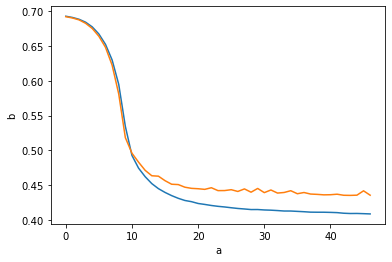

In [47]:
# 시각화 해보기
import matplotlib.pyplot as plt


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('a')
plt.ylabel('b')
plt.show()